In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Overivew of American Data Set

In [22]:
!pwd

/Users/Andrew/Desktop/final_project_gtech/isye_6740_final_project_accents


In [135]:
df_train = pd.read_csv('../data/archive/train_data.csv')
df_test = pd.read_csv('../data/archive/test_data.csv')

In [137]:
df_train.dropna(how='all', inplace=True)
df_test.dropna(how='all', inplace=True)

In [139]:
accent_map = {
    'DR1':'New England',
    'DR2':'Northern',
    'DR3': 'North Midland',
    'DR4': 'South Midland',
    'DR5': 'Southern', 
    'DR6': 'New York City',
    'DR7': 'Western',
    'DR8': 'Moved Around'
}

In [140]:
df_train['dialect_region'] = df_train['dialect_region'].map(accent_map)
df_test['dialect_region'] = df_test['dialect_region'].map(accent_map)

### Number of Speakers

dialect_region
Moved Around     22
New York City    35
New England      38
South Midland    68
Southern         70
North Midland    76
Northern         76
Western          77
Name: speaker_id, dtype: int64

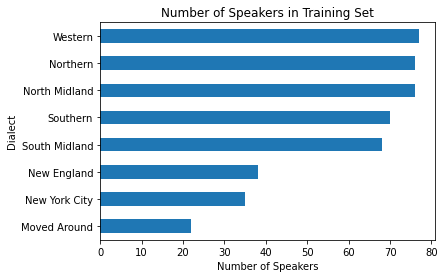

In [141]:
df_train.groupby('dialect_region')['speaker_id'].nunique().sort_values().plot(kind='barh')
plt.title('')
plt.xlabel('Number of Speakers')
plt.ylabel('Dialect')
plt.title('Number of Speakers in Training Set')
plt.savefig('eda_final_report/train_speakers.png')

df_train.groupby('dialect_region')['speaker_id'].nunique().sort_values()

dialect_region
Moved Around     11
New England      11
New York City    11
Western          23
North Midland    26
Northern         26
Southern         28
South Midland    32
Name: speaker_id, dtype: int64

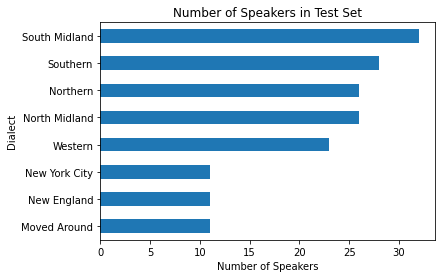

In [142]:
df_test.groupby('dialect_region')['speaker_id'].nunique().sort_values().plot(kind='barh')
plt.xlabel('Number of Speakers')
plt.ylabel('Dialect')
plt.title('Number of Speakers in Test Set')
plt.savefig('eda_final_report/test_speakers.png')

df_test.groupby('dialect_region')['speaker_id'].nunique().sort_values()

In [145]:
# number of speaker IDs in train that are in test 
df_train.speaker_id.isin(df_test.speaker_id).sum(), df_test.speaker_id.isin(df_train.speaker_id).sum()

(0, 0)

### Sex

In [146]:
df_train['sex'] = df_train.speaker_id.str[0]
df_test['sex'] = df_test.speaker_id.str[0]

sex
F    136
M    326
Name: speaker_id, dtype: int64

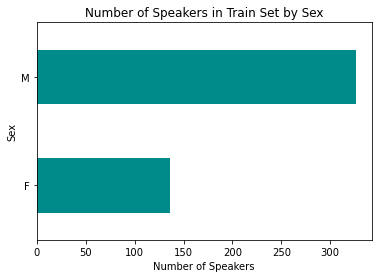

In [149]:
df_train.groupby('sex')['speaker_id'].nunique().sort_values().plot(kind='barh', color='#008B8B')
plt.xlabel('Number of Speakers')
plt.ylabel('Sex')
plt.title('Number of Speakers in Train Set by Sex')
plt.savefig('eda_final_report/train_sex.png')

df_train.groupby('sex')['speaker_id'].nunique().sort_values()

sex
F     56
M    112
Name: speaker_id, dtype: int64

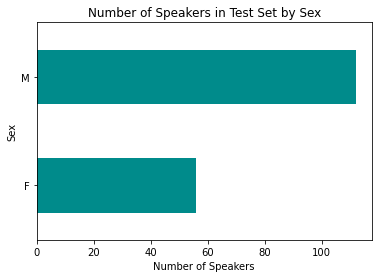

In [150]:
df_test.groupby('sex')['speaker_id'].nunique().sort_values().plot(kind='barh', color='#008B8B')
plt.xlabel('Number of Speakers')
plt.ylabel('Sex')
plt.title('Number of Speakers in Test Set by Sex')
plt.savefig('eda_final_report/test_sex.png')

df_test.groupby('sex')['speaker_id'].nunique().sort_values()

# words

In [151]:
from os import listdir
from os.path import isfile, join
from collections import Counter

file_names = listdir('train')

In [174]:
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

,word,count
word,,
the,the,599
to,to,352
in,in,313
a,a,301
all,all,223
that,that,215
she,she,208
an,an,207
your,your,202


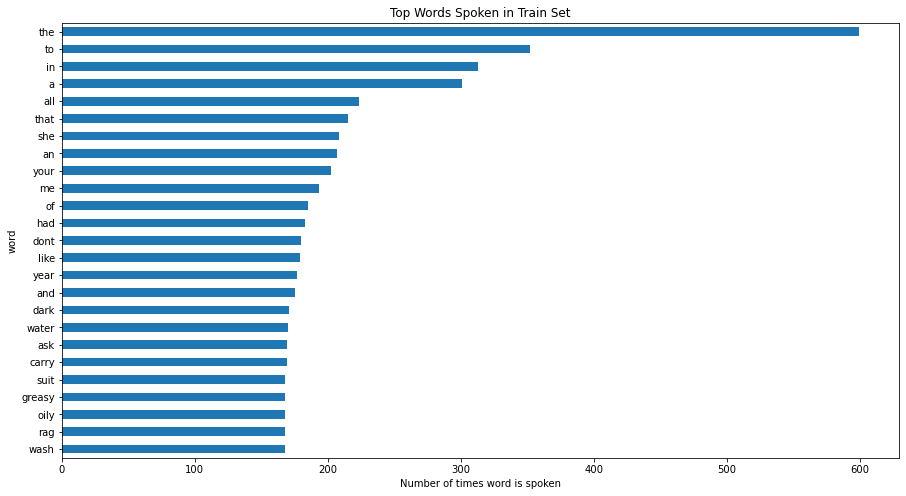

In [176]:
df_train_words = pd.DataFrame(count_dict.most_common(25), columns=['word', 'count'])
df_train_words.index = df_train_words.word

plt.figure(figsize=(15,8))
df_train_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times word is spoken')
plt.title('Top Words Spoken in Train Set')
plt.savefig('eda_final_report/word_counts_train.png')

df_train_words.sort_values('count', ascending=False)

,word,count
word,,
the,the,599
to,to,352
in,in,313
a,a,301
all,all,223
that,that,215
she,she,208
an,an,207
your,your,202


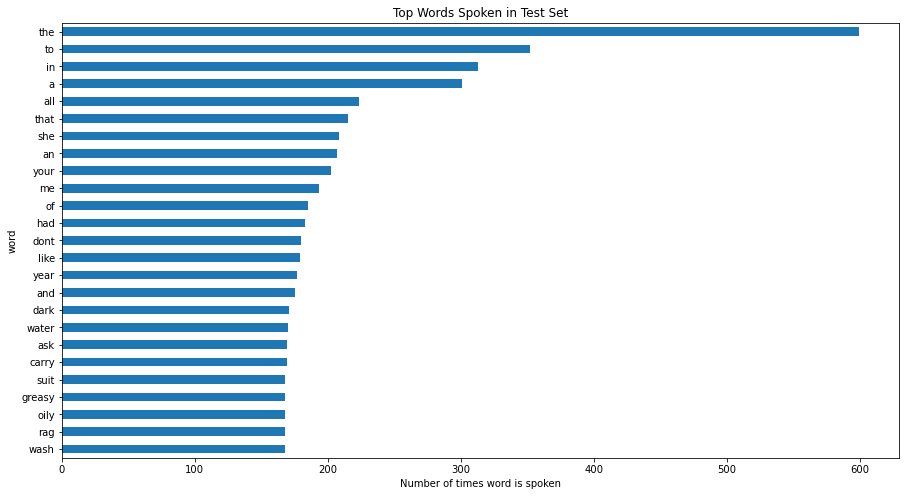

In [183]:
file_names = listdir('test')
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

plt.figure(figsize=(15,8))

df_test_words = pd.DataFrame(count_dict.most_common(25), columns=['word', 'count'])
df_test_words.index = df_test_words.word

df_test_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times word is spoken')
plt.title('Top Words Spoken in Test Set')
plt.savefig('eda_final_report/word_counts_test.png')

df_test_words.sort_values('count', ascending=False)

### phonemes

In [187]:
file_names = listdir('phoneme_train')

,phoneme,count
phoneme,,
h#,h#,9240
ix,ix,8642
s,s,7475
n,n,7068
iy,iy,6953
tcl,tcl,6644
r,r,6539
kcl,kcl,5859
l,l,5801


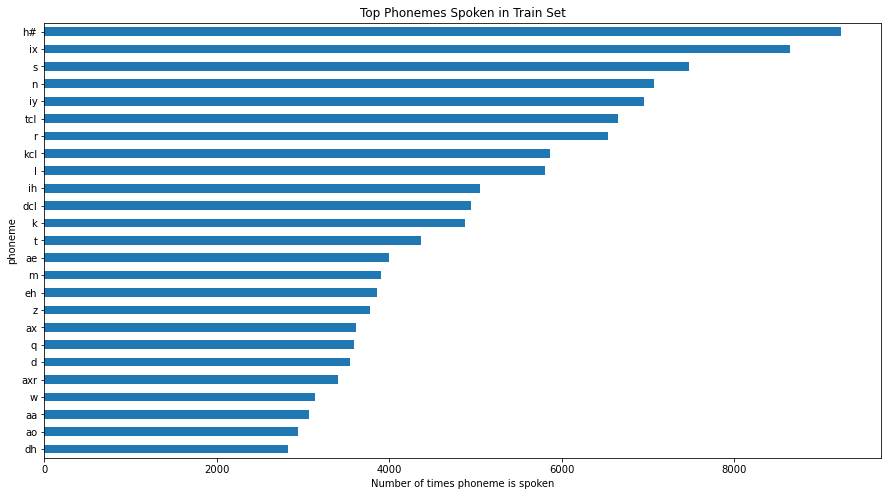

In [188]:
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

plt.figure(figsize=(15,8))

df_train_words = pd.DataFrame(count_dict.most_common(25), columns=['phoneme', 'count'])
df_train_words.index = df_train_words.phoneme

df_train_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times phoneme is spoken')
plt.title('Top Phonemes Spoken in Train Set')
plt.savefig('eda_final_report/phoneme_counts_train.png')

df_train_words.sort_values('count', ascending=False)

In [185]:
file_names = listdir('phoneme_test')

,phoneme,count
phoneme,,
h#,h#,3360
ix,ix,2945
iy,iy,2710
s,s,2639
r,r,2525
n,n,2501
l,l,2356
tcl,tcl,2334
kcl,kcl,1964


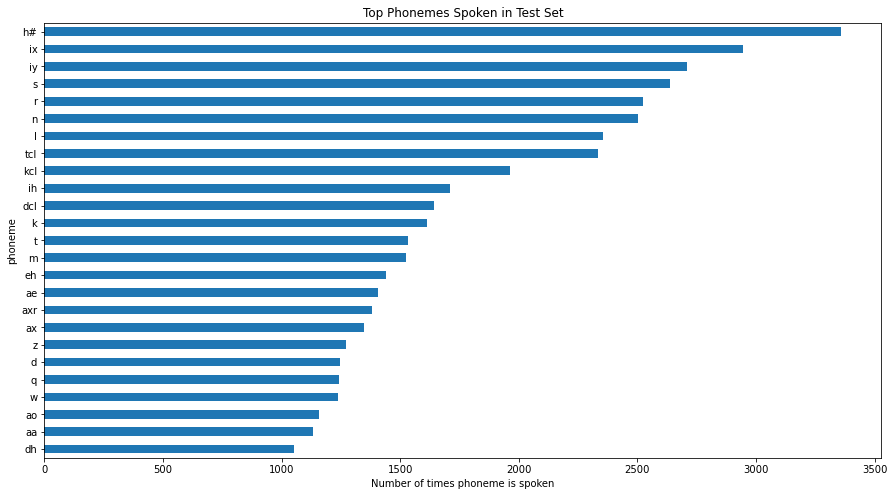

In [186]:
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

plt.figure(figsize=(15,8))

df_test_words = pd.DataFrame(count_dict.most_common(25), columns=['phoneme', 'count'])
df_test_words.index = df_test_words.phoneme

df_test_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times phoneme is spoken')
plt.title('Top Phonemes Spoken in Test Set')
plt.savefig('eda_final_report/phoneme_counts_test.png')

df_test_words.sort_values('count', ascending=False)

# British Set Overview

In [189]:
df_british = pd.read_csv('british_data_set_word_files/df.csv')

In [194]:
df_british['sex'] = df_british.speaker.str.lower().str[0]

,Unnamed: 0,index,recording,speaker,word,word_id,duration,start,end,sex
0,0,1,A01,F1,GOOD,A01_Good_1,2425,12546,14971,f
1,1,2,A01,F1,MORNING,A01_morning_2,8600,14971,23571,f
2,2,4,A01,F1,MORE,A01_more_4,3528,39226,42754,f
3,3,5,A01,F1,NEWS,A01_news_5,7277,42754,50031,f
4,4,6,A01,F1,ABOUT,A01_about_6,4630,50031,54661,f
...,...,...,...,...,...,...,...,...,...,...
51428,51428,62661,M09,M50,BURNS,M09_Burns_495,9261,3033462,3042723,m
51429,51429,62662,M09,M50,NIGHT,M09_night_496,5513,3042723,3048236,m
51430,51430,62664,M09,M50,HERE,M09_here_498,4851,3057805,3062656,m
51431,51431,62665,M09,M50,ON,M09_on_499,4631,3062656,3067287,m


In [195]:
# number of speakers
df_british.speaker.nunique()

68

sex
f    18
m    50
Name: speaker, dtype: int64

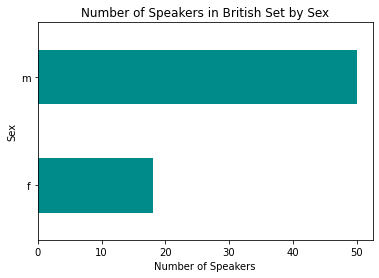

In [197]:
# speakers by gender
df_british.groupby('sex')['speaker'].nunique().sort_values().plot(kind='barh', color='#008B8B')
plt.xlabel('Number of Speakers')
plt.ylabel('Sex')
plt.title('Number of Speakers in British Set by Sex')
plt.savefig('eda_final_report/british_set_sex.png')

df_british.groupby('sex')['speaker'].nunique().sort_values()

have     258
this     268
by       270
be       273
one      278
you      299
his      305
with     312
but      321
at       322
i        361
it       410
as       415
on       417
is       429
he       451
for      532
was      590
that     591
a       1177
in      1242
to      1296
and     1503
of      1556
the     3523
Name: word, dtype: int64

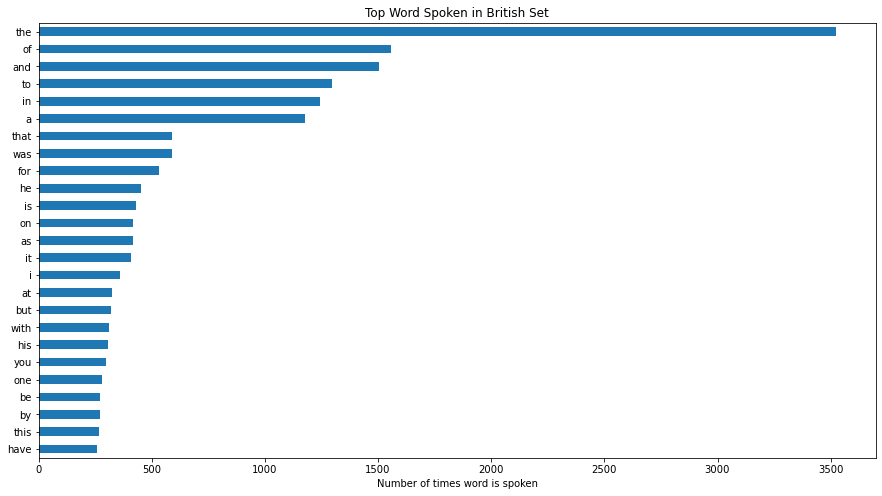

In [204]:
# most common words
plt.figure(figsize=(15,8))

df_british.word.str.lower().value_counts()[0:25].sort_values().plot(kind='barh')

plt.xlabel('Number of times word is spoken')
plt.title('Top Word Spoken in British Set')
plt.savefig('eda_final_report/british_word_counts.png')
df_british.word.str.lower().value_counts()[0:25].sort_values()

In [222]:
df_british.word.nunique()

7318

### words in common

In [207]:
df_british.word.str.lower()

0           good
1        morning
2           more
3           news
4          about
          ...   
51428      burns
51429      night
51430       here
51431         on
51432      radio
Name: word, Length: 51433, dtype: object

In [209]:
american_file_names = listdir('train') + listdir('test')

In [223]:
american_words = set([x.split('_')[0] for x in american_file_names])

# number of unique american words
len(american_words)

6078

In [220]:
common_words = american_words.intersection(df_british.word.str.lower())

# number of words in common
len(common_words)

2726

In [224]:
american_word_counts = Counter()

for filename in american_file_names:
    word = filename.split('_')[0]
    american_word_counts[word] += 1

In [248]:
df_british_word_counts = pd.DataFrame(df_british.word.str.lower().value_counts())
df_british_word_counts.rename(columns={'word':'british_word_count'}, inplace=True)

In [249]:
df_american_word_counts = pd.DataFrame.from_dict(dict(american_word_counts), orient='index', columns=['american_word_count'])

In [251]:
df_word_counts = df_british_word_counts.merge(df_american_word_counts, left_index=True, right_index=True, how='outer')
df_word_counts.fillna(0,inplace=True)

have     258
this     268
by       270
be       273
one      278
you      299
his      305
with     312
but      321
at       322
i        361
it       410
as       415
on       417
is       429
he       451
for      532
was      590
that     591
a       1177
in      1242
to      1296
and     1503
of      1556
the     3523
Name: word, dtype: int64

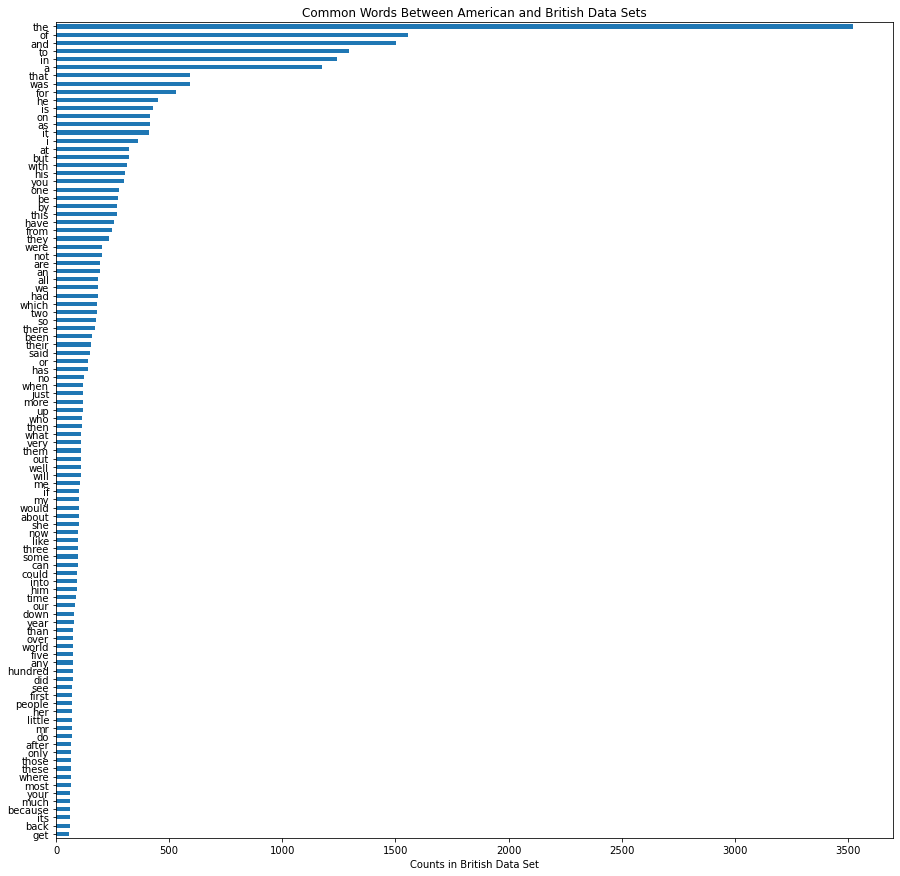

In [266]:
df_word_counts['multiplied'] = df_word_counts['british_word_count'] * df_word_counts['american_word_count']

plt.figure(figsize=(15,15))

df_word_counts.sort_values('multiplied', ascending=False).sort_values('british_word_count', ascending=False)['british_word_count'][0:100].sort_values(ascending=True).plot(kind='barh')

plt.xlabel('Counts in British Data Set')
plt.title('Common Words Between American and British Data Sets')
plt.savefig('eda_final_report/british_american_common_word_counts.png')
df_british.word.str.lower().value_counts()[0:25].sort_values()

In [267]:
# British phonemes